<a href="https://colab.research.google.com/github/AkhilaGuptaP/ML_Capstone/blob/main/Draft4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
# Import Libraries

# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To filter and suppress warning messages issued by code. The purpose is to prevent warning messages from cluttering the console or logs.
import warnings
warnings.filterwarnings('ignore')


# Tells to render Matplotlib plots as static images directly within the notebook itself
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold,train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score,f1_score,log_loss

import time


Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
Insurance_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module6(ML)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (1).csv')

Dataset First View

In [ ]:
# Dataset First Look
Insurance_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
Gender,Male,Male,Male,Male,Female,Female,Male,Female,Female,Female
Age,44,76,47,21,29,24,23,56,24,32
Driving_License,1,1,1,1,1,1,1,1,1,1
Region_Code,28.0,3.0,28.0,11.0,41.0,33.0,11.0,28.0,3.0,6.0
Previously_Insured,0,0,0,1,1,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year,< 1 Year,< 1 Year,1-2 Year,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No,Yes,Yes,Yes,No,No
Annual_Premium,40454.0,33536.0,38294.0,28619.0,27496.0,2630.0,23367.0,32031.0,27619.0,28771.0
Policy_Sales_Channel,26.0,26.0,26.0,152.0,152.0,160.0,152.0,26.0,152.0,152.0


In [ ]:
# Dataset Rows & Columns count
print(f'Original dataset has {Insurance_df.shape[0]} Row & {Insurance_df.shape[1]} Columns.')

Original dataset has 381109 Row & 12 Columns.


Dataset Information

In [ ]:
# Dataset Info
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=Insurance_df.duplicated().sum()
print("Dataset duplicate value count is ",duplicate_count)

Dataset duplicate value count is  0


Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values=Insurance_df.isna().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Data Wrangling Code

In [ ]:
# Converting certain columns to appropriate data types
Insurance_df['Region_Code'] = Insurance_df['Region_Code'].astype(int)
Insurance_df['Policy_Sales_Channel'] = Insurance_df['Policy_Sales_Channel'].astype(int)
Insurance_df['Vintage'] = Insurance_df['Vintage'].astype(int)
Insurance_df['Response'] = Insurance_df['Response'].astype(int)  # Assuming 'Response' should be an integer

**Visualizations**

### **Chart 1: Gender by Driving License Status Count**

<Figure size 2000x700 with 0 Axes>

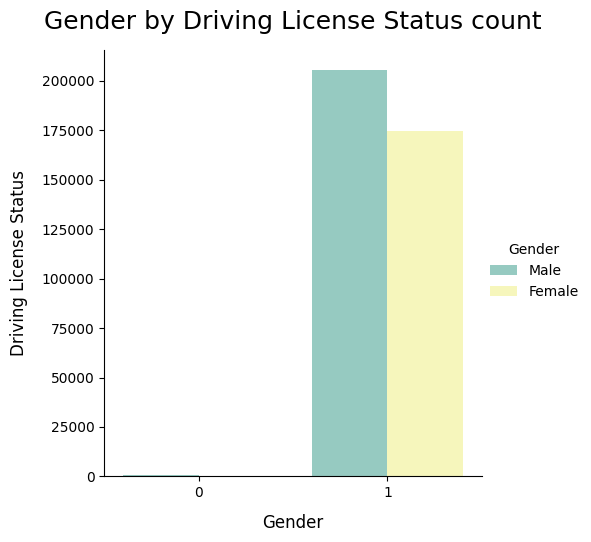

In [ ]:
# Create the plot
plt.figure(figsize=(20, 7))

# Creating Categorical Bar plot
sns.catplot(x="Driving_License", hue="Gender", data=Insurance_df, kind="count",palette="Set3")

#Adding labels and title to the plot
plt.xlabel('Gender',fontsize=12,labelpad=10)
plt.ylabel("Driving License Status", fontsize=12, labelpad=10)
plt.title("Gender by Driving License Status count",fontsize=18,pad=15)

#Show the plot
plt.show()

OR Pie charts seperate

In [ ]:
#Finding count of people who has driving license per Gender
dl_yes=Insurance_df.groupby('Gender')['Driving_License'].apply(lambda x:(x==1).sum()).reset_index(name='dl_count')
dl_yes

,Gender,dl_count
0,Female,174808
1,Male,205489


In [ ]:
dl_no=Insurance_df.groupby('Gender')['Driving_License'].apply(lambda x:(x==0).sum()).reset_index(name='dl_count')
dl_no

,Gender,dl_count
0,Female,212
1,Male,600


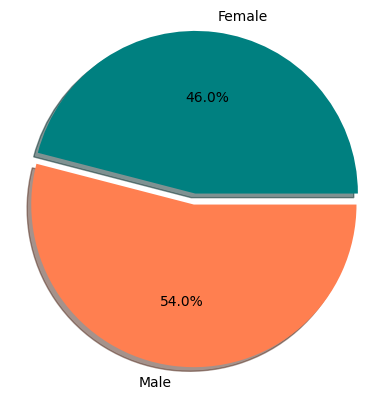

In [ ]:
#fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Creating pieplot for room types with explode and custom colors
explode_range = [0.025,0.05]
my_colors=['teal','coral']

plt.pie(dl_yes['dl_count'],labels=dl_yes['Gender'],explode=explode_range,autopct='%1.1f%%',shadow=True,colors=my_colors,radius=1.1)
plt.show()



### **Chart2: Count of people per each region code**

In [ ]:
#Just displaying the count

region_per_count=Insurance_df.groupby('Region_Code')['id'].count().reset_index(name='total_count')
region_per_count.sort_values('total_count',ascending=False,inplace=True)
region_per_count.head()

,Region_Code,total_count
28,28,106415
8,8,33877
46,46,19749
41,41,18263
15,15,13308


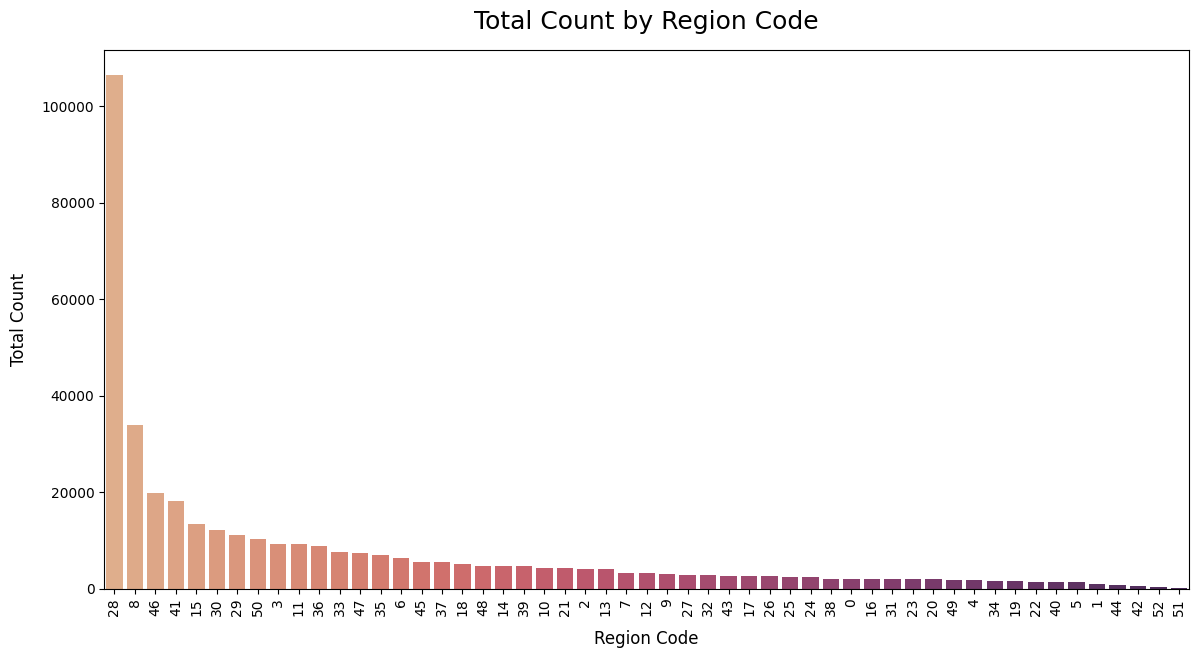

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=Insurance_df,x='Region_Code',order=Insurance_df['Region_Code'].value_counts().index,palette='flare')

#Adding labels and title to the plot
plt.xlabel('Region Code',fontsize=12,labelpad=10)
plt.ylabel("Total Count", fontsize=12, labelpad=10)
plt.title("Total Count by Region Code",fontsize=18,pad=15)

#Rotating the X axis legends
plt.xticks(rotation=90)

#Show the plot
plt.show()

### **Chart3 : Count of vehicles wrt age and hue as damage**

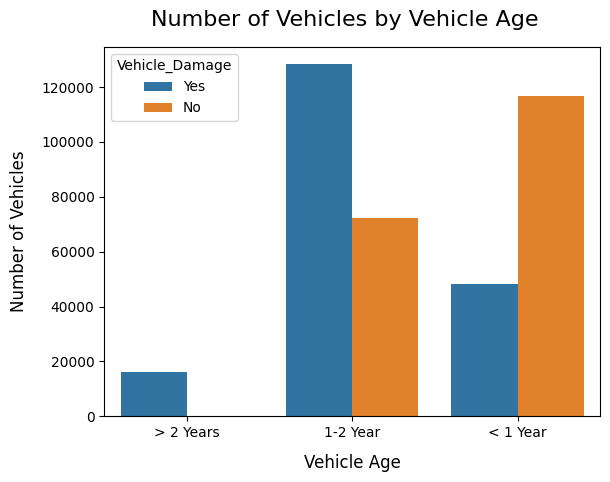

In [ ]:
#Create a count plot
sns.countplot(data=Insurance_df,x='Vehicle_Age',hue='Vehicle_Damage')

#Adding labels and title to the plot
plt.xlabel('Vehicle Age',fontsize=12,labelpad=10)
plt.ylabel("Number of Vehicles", fontsize=12, labelpad=10)
plt.title("Number of Vehicles by Vehicle Age  ",fontsize=16,pad=15)

#Show the plot
plt.show()

### **chart4: Vehicle age vs Premium average**

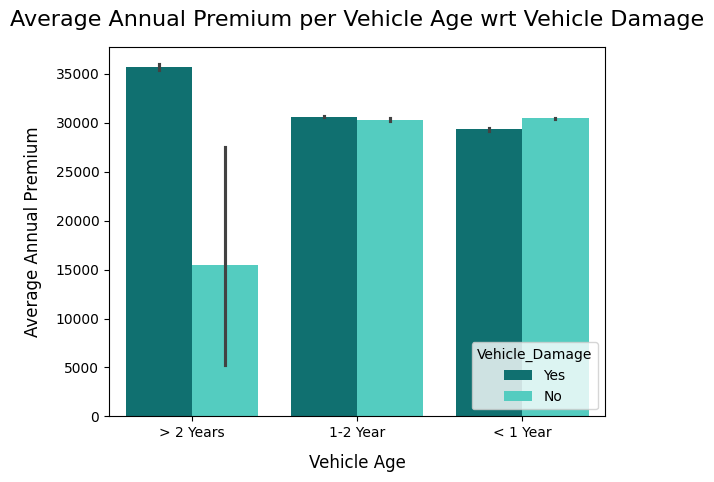

In [ ]:
#Create a barplot
sns.barplot(data=Insurance_df,x='Vehicle_Age',y='Annual_Premium',hue='Vehicle_Damage',palette={'Yes':'Teal','No':'Turquoise'})

#Adding labels and title to the plot
plt.xlabel('Vehicle Age',fontsize=12,labelpad=10)
plt.ylabel("Average Annual Premium", fontsize=12, labelpad=10)
plt.title("Average Annual Premium per Vehicle Age wrt Vehicle Damage",fontsize=16,pad=15)

#Show the plot
plt.show()

### **Chart 5 : Gender by Previously_insurance and response**

In [ ]:
prev_yes_count=Insurance_df.groupby('Gender')['Previously_Insured'].apply(lambda x:(x==1).sum()).reset_index()
prev_yes_count.rename(columns={'Previously_Insured':'Previously_Insured_YES'},inplace=True)
prev_yes_count

,Gender,Previously_Insured_YES
0,Female,87949
1,Male,86679


In [ ]:
prev_no_count=Insurance_df.groupby('Gender')['Previously_Insured'].apply(lambda x:(x==0).sum()).reset_index()
prev_no_count.rename(columns={'Previously_Insured':'Previously_Insured_NO'},inplace=True)
prev_no_count

,Gender,Previously_Insured_NO
0,Female,87071
1,Male,119410


In [ ]:
response_yes_count=Insurance_df.groupby('Gender')['Response'].apply(lambda x:(x==1).sum()).reset_index()
response_yes_count.rename(columns={'Response':'Response_YES'},inplace=True)
response_yes_count

,Gender,Response_YES
0,Female,18185
1,Male,28525


In [ ]:
response_no_count=Insurance_df.groupby('Gender')['Response'].apply(lambda x:(x==0).sum()).reset_index()
response_no_count.rename(columns={'Response':'Response_NO'},inplace=True)
response_no_count

,Gender,Response_NO
0,Female,156835
1,Male,177564


In [ ]:
#to keep it short, we can rewrite as below
#Merging to get one table with total count of previously insured and response wrt gender
count_result_short=pd.merge(pd.merge(pd.merge(prev_yes_count,prev_no_count,on='Gender'),response_yes_count,on='Gender'),response_no_count,on='Gender')
count_result_short

,Gender,Previously_Insured_YES,Previously_Insured_NO,Response_YES,Response_NO
0,Female,87949,87071,18185,156835
1,Male,86679,119410,28525,177564


In [ ]:
prev_and_res_YES=pd.merge(prev_yes_count,response_yes_count,on='Gender')
prev_and_res_YES

,Gender,Previously_Insured_YES,Response_YES
0,Female,87949,18185
1,Male,86679,28525


In [ ]:
#Reshaping the data using pd.melt to plot comparison
df_melted_YES = pd.melt(prev_and_res_YES, id_vars='Gender', var_name='Yes', value_name='Value')
df_melted_YES

,Gender,Yes,Value
0,Female,Previously_Insured_YES,87949
1,Male,Previously_Insured_YES,86679
2,Female,Response_YES,18185
3,Male,Response_YES,28525


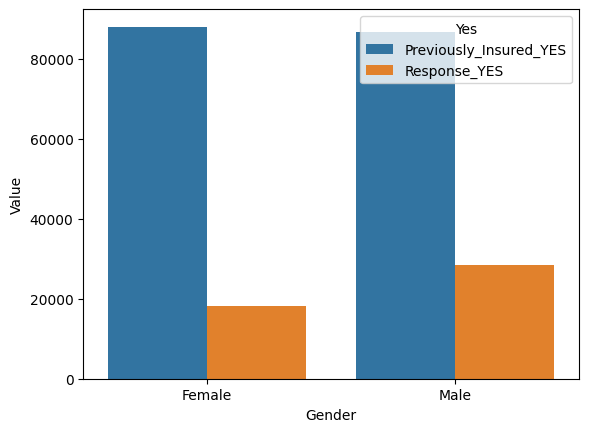

In [ ]:
#Create side-by-side bar plot to compare Previously Insured and Response(Yes)
sns.barplot(data=df_melted_YES,x='Gender',y='Value',hue='Yes')

#Show the plot
plt.show()

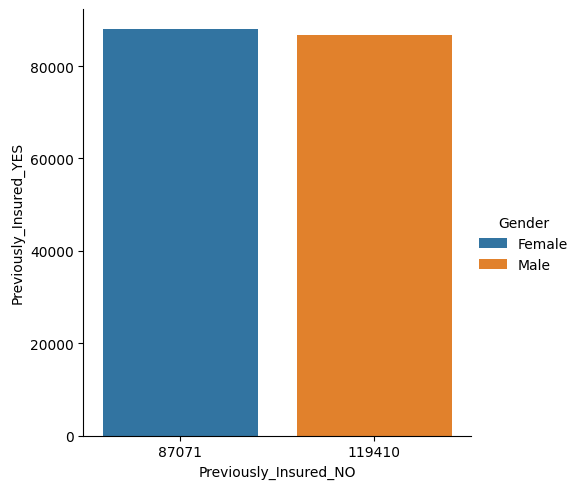

In [ ]:
sns.catplot(data=count_result_short,x='Previously_Insured_NO',y='Previously_Insured_YES',hue='Gender',kind='bar')

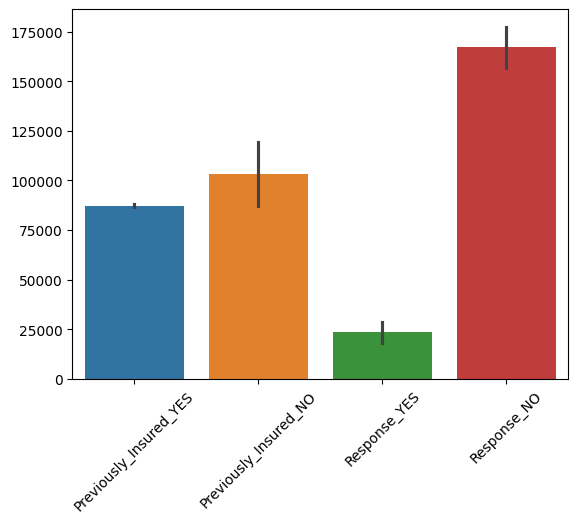

In [ ]:
sns.barplot(data=count_result_short[['Previously_Insured_YES','Previously_Insured_NO','Response_YES','Response_NO']])
plt.xticks(rotation=45)
plt.show()

### **Chart 6: Response(yes_count) per region code**

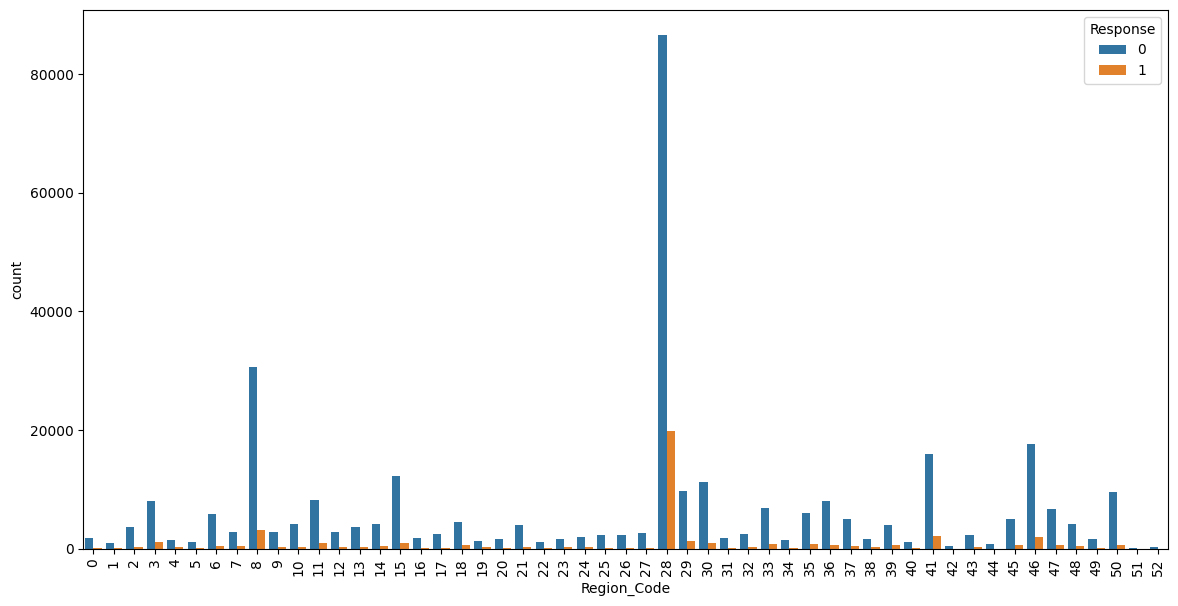

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=Insurance_df,x='Region_Code',hue='Response')
plt.xticks(rotation=90)
plt.show()

In [ ]:
response_yes_per_region=Insurance_df.groupby('Region_Code')['Response'].apply(lambda x:(x==1).sum()).reset_index(name='Total Yes Response count')

response_yes_per_region.head()

,Region_Code,Total Yes Response count
0,0,174
1,1,109
2,2,287
3,3,1181
4,4,285


In [ ]:
response_yes_per_region.sort_values('Total Yes Response count',ascending=False,inplace=True)
response_yes_per_region.head()

,Region_Code,Total Yes Response count
28,28,19917
8,8,3257
41,41,2224
46,46,2032
29,29,1365


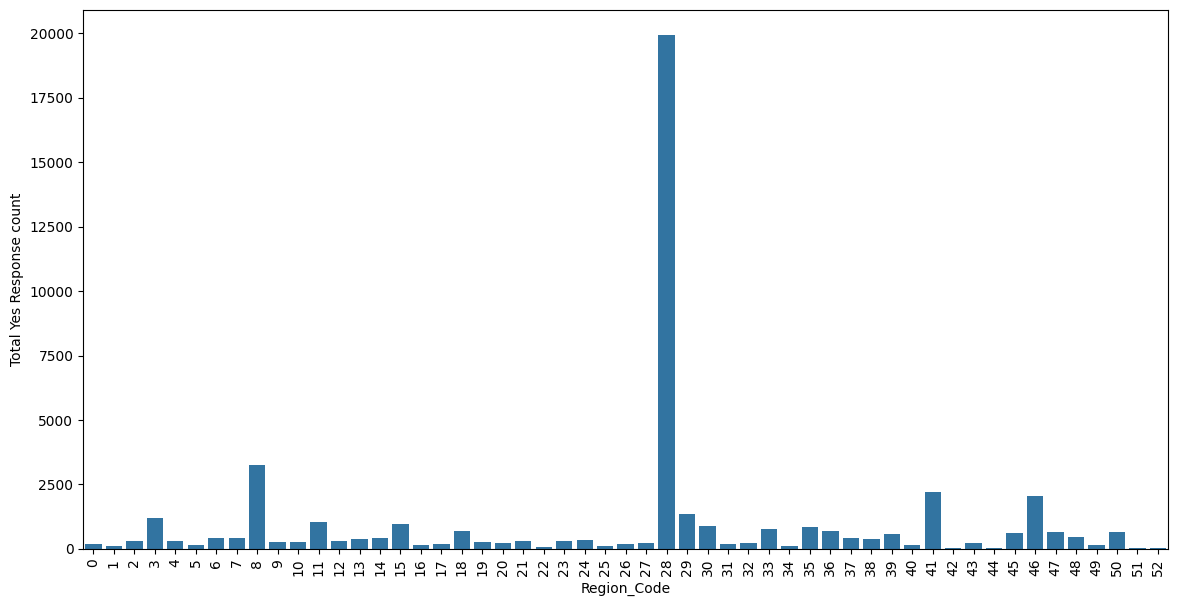

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=response_yes_per_region,x='Region_Code',y='Total Yes Response count')
plt.xticks(rotation=90)
plt.show()

### **Chart 7: People age group vs driving license(yes)**

In [ ]:
Insurance_df['Age_Group']=Insurance_df['Age'].apply(lambda x:'Young Age' if x>=20 and x<=45 else 'Middle Age' if x>45 and x<=60 else 'Old Age')
Insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1,Young Age
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0,Old Age
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1,Middle Age
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0,Young Age
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0,Young Age


In [ ]:
age_dl_yes=Insurance_df.groupby('Age_Group')['Driving_License'].apply(lambda x:(x==1).sum()).reset_index(name='DL_Yes')
age_dl_yes

,Age_Group,DL_Yes
0,Middle Age,80348
1,Old Age,42649
2,Young Age,257300


In [ ]:
age_dl_no=Insurance_df.groupby('Age_Group')['Driving_License'].apply(lambda x:(x==0).sum()).reset_index(name='DL_No')
age_dl_no

,Age_Group,DL_No
0,Middle Age,178
1,Old Age,590
2,Young Age,44


In [ ]:
age_group_dl=pd.merge(age_dl_yes,age_dl_no,on='Age_Group')
age_group_dl

,Age_Group,DL_Yes,DL_No
0,Middle Age,80348,178
1,Old Age,42649,590
2,Young Age,257300,44


In [ ]:
# Reshape the data using pd.melt
df_melted_dl = pd.melt(age_group_dl, id_vars='Age_Group', var_name='DL', value_name='Value')
df_melted_dl

,Age_Group,DL,Value
0,Middle Age,DL_Yes,80348
1,Old Age,DL_Yes,42649
2,Young Age,DL_Yes,257300
3,Middle Age,DL_No,178
4,Old Age,DL_No,590
5,Young Age,DL_No,44


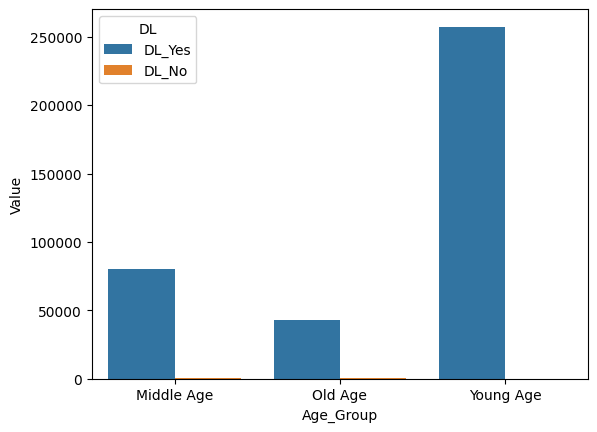

In [ ]:
sns.barplot(data=df_melted_dl,x='Age_Group',y='Value',hue='DL')

plt.show()

## **Feature Engineering & Data Pre-processing**

### **Handling Outliers**

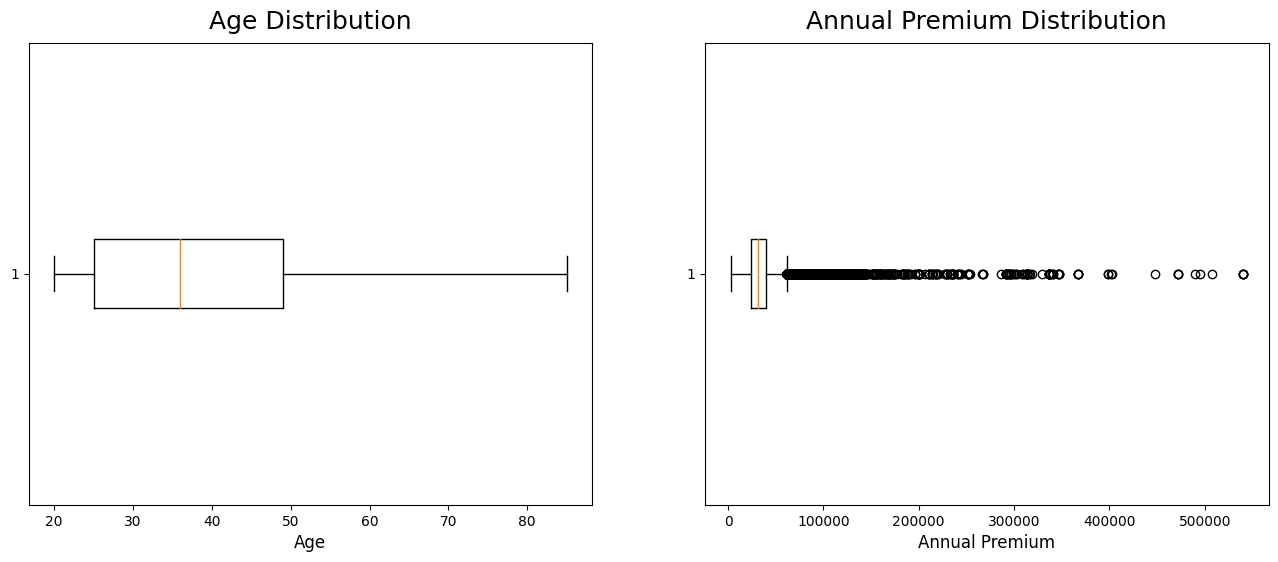

In [ ]:
#Identifying Outliers
# Handling Outliers & Outlier treatments

# Creating subplot with 1 row and 2 columns, and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plotting boxplot on Age on first subplot
axes[0].boxplot(Insurance_df['Age'],vert=False)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_title('Age Distribution', fontsize=18,pad=10)


#Plotting boxplot on Annual Premium on second subplot
axes[1].boxplot(Insurance_df['Annual_Premium'],vert=False)
axes[1].set_xlabel('Annual Premium', fontsize=12)
axes[1].set_title('Annual Premium Distribution', fontsize=18,pad=10)

plt.show()

We tried checking numerical columns to identify outlier presence.
Using boxplot we plot Age and Annual Premium.
No outliers found wth Age.However,Outliers detected with Annual Premium, handling the outliers below

**Handling Outliers**
**Method1 : IQR Outlier Removal**

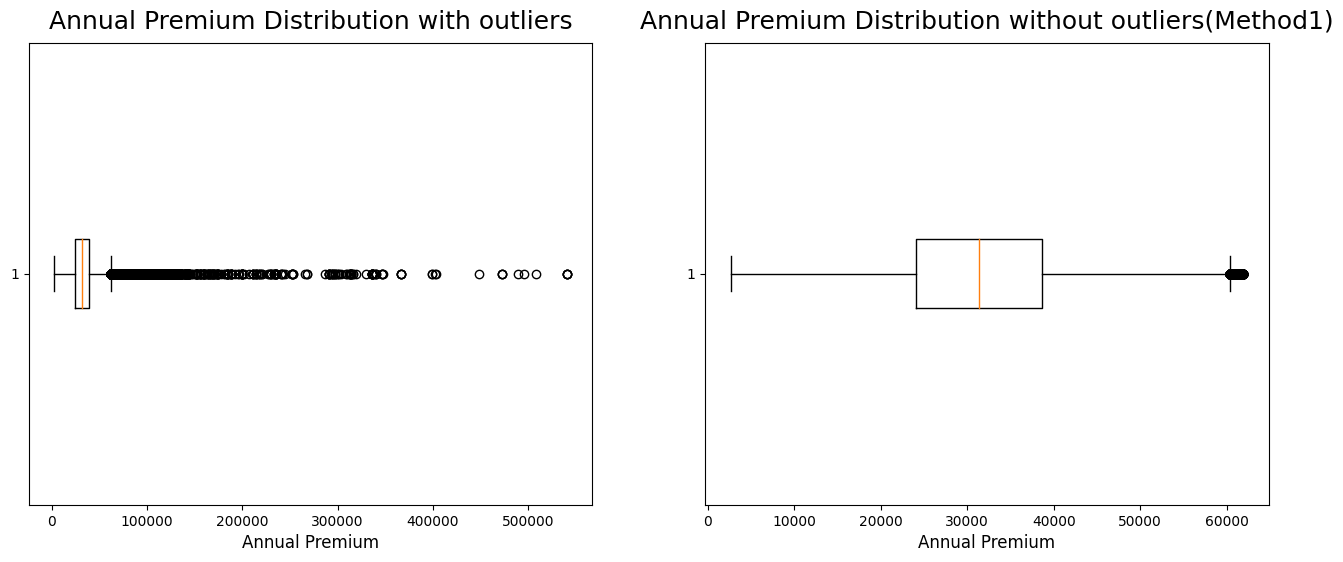

In [ ]:
# Calculate the first and third quartiles, and the interquartile range
Q1 = Insurance_df['Annual_Premium'].quantile(0.25)
Q3 = Insurance_df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for identifying outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter the data to remove outliers based on the price
AnnualPremium_no_outliers1= Insurance_df[(Insurance_df['Annual_Premium'] >= lower_bound) & (Insurance_df['Annual_Premium'] <= upper_bound)]

#Plotting boxplot after removing outliers

# Creating subplot with 1 row and 2 columns, and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plotting boxplot on Annual Premium with outliers on first subplot
axes[0].boxplot(Insurance_df['Annual_Premium'],vert=False)
axes[0].set_xlabel('Annual Premium', fontsize=12)
axes[0].set_title('Annual Premium Distribution with outliers', fontsize=18,pad=10)


#Plotting boxplot on Annual Premium without outliers on second subplot
axes[1].boxplot(AnnualPremium_no_outliers1['Annual_Premium'],vert=False)
axes[1].set_xlabel('Annual Premium', fontsize=12)
axes[1].set_title('Annual Premium Distribution without outliers(Method1)', fontsize=18,pad=10)

plt.show()

**Method 2:  Percentile-Based Outlier Removal**

In [ ]:
lower_bound_list=[0.05,0.1,0.15,0.2,0.21,0.22,0.23,0.24,0.25,0.3]
upper_bound_list=[0.99,0.98,0.95,0.9,0.85,0.8,0.79,0.77,0.75,0.7]

for i in range(len(lower_bound_list)):
  low_quantile=Insurance_df['Annual_Premium'].quantile(lower_bound_list[i])
  upper_quantile=Insurance_df['Annual_Premium'].quantile(upper_bound_list[i])
  print(f'For lower_bound={lower_bound_list[i]} and upper_bound={upper_bound_list[i]}')
  print(low_quantile)
  print(upper_quantile)

For lower_bound=0.05 and upper_bound=0.99
2630.0
72963.0
For lower_bound=0.1 and upper_bound=0.98
2630.0
65380.83999999997
For lower_bound=0.15 and upper_bound=0.95
2630.0
55176.0
For lower_bound=0.2 and upper_bound=0.9
21583.600000000006
48431.0
For lower_bound=0.21 and upper_bound=0.85
22331.0
44547.0
For lower_bound=0.22 and upper_bound=0.8
22940.0
41711.0
For lower_bound=0.23 and upper_bound=0.79
23481.0
41214.0
For lower_bound=0.24 and upper_bound=0.77
23959.0
40287.0
For lower_bound=0.25 and upper_bound=0.75
24405.0
39400.0
For lower_bound=0.3 and upper_bound=0.7
26238.0
37548.0


In [ ]:
lower_bound=0.2
upper_bound=0.95

low_quantile=Insurance_df['Annual_Premium'].quantile(lower_bound)
upper_quantile=Insurance_df['Annual_Premium'].quantile(upper_bound)

print(f"Lower quantile is{low_quantile} and Upper quantile is {upper_quantile}")
print()

AnnualPremium_no_outliers2 = Insurance_df[(Insurance_df['Annual_Premium'] >= low_quantile) & (Insurance_df['Annual_Premium'] <= upper_quantile)]
AnnualPremium_no_outliers2


Lower quantile is21583.600000000006 and Upper quantile is 55176.0



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170.0,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016.0,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118.0,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617.0,124,74,0


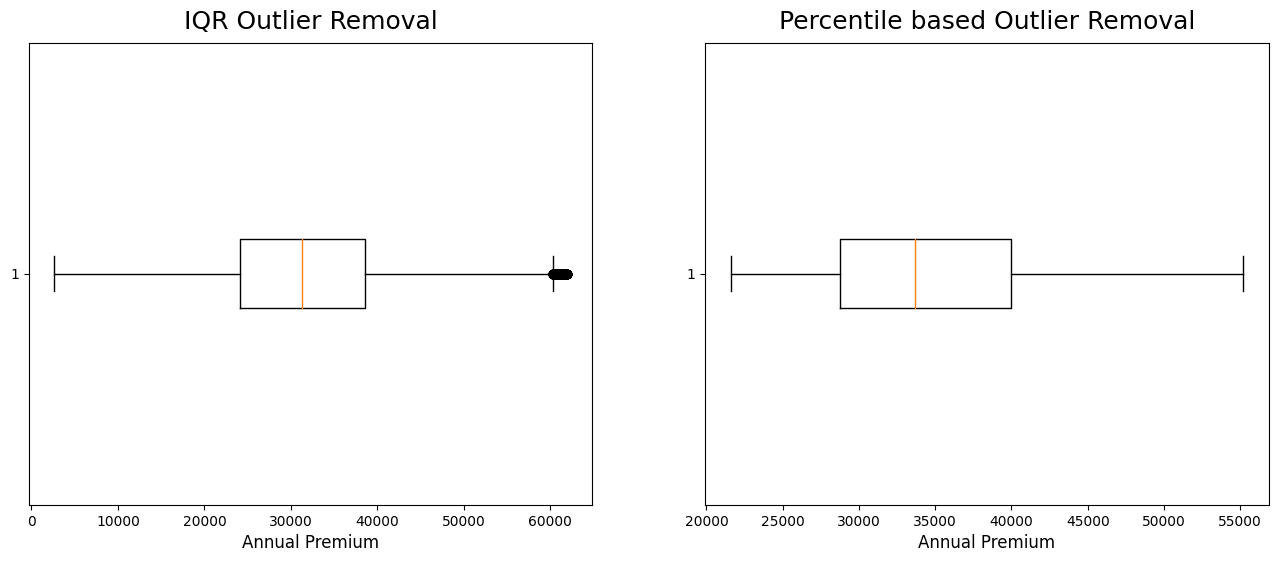

In [ ]:
# Creating subplot with 1 row and 2 columns, and set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#Plotting boxplot on Annual Premium using Method1(IQR outlier removal) on first subplot
axes[0].boxplot(AnnualPremium_no_outliers1['Annual_Premium'],vert=False)
axes[0].set_xlabel('Annual Premium', fontsize=12)
axes[0].set_title('IQR Outlier Removal', fontsize=18,pad=10)

#Plotting boxplot on Annual Premium using Method1(Percentile based outlier removal) on second subplot
axes[1].boxplot(AnnualPremium_no_outliers2['Annual_Premium'],vert=False)
axes[1].set_xlabel('Annual Premium', fontsize=12)
axes[1].set_title('Percentile based Outlier Removal', fontsize=18,pad=10)

plt.show()

To detect outliers from the data, used boxplot on numerical features i.e., Age and Annual Premium.
Detected outliers in feature 'Annual Premium' hence tried two methods for outlier removal
Method1 - IQR Outlier Removal : Removing the data points outside InterQuartileRange.
Method2- Percentile based outlier removal : Tried different lower bound and upper bound , and removed outliers with best possible lower bound=0.2 and upper bound=0.95


In [ ]:
#Dataset after outlier removal
Insurance_df=AnnualPremium_no_outliers2
Insurance_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170.0,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016.0,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118.0,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617.0,124,74,0


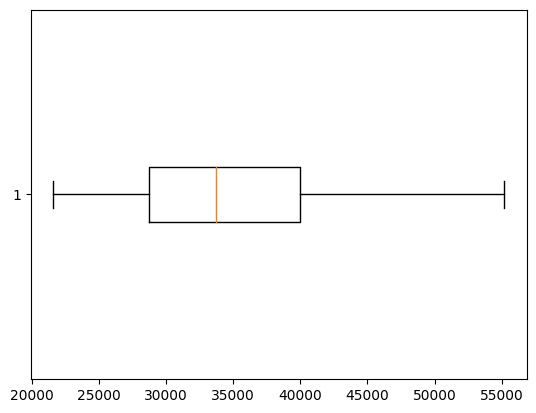

In [ ]:
plt.boxplot(Insurance_df['Annual_Premium'],vert=False)
plt.show()

### Categorical Encoding

In [ ]:
# Encode your categorical columns

Insurance_df['Gender']=Insurance_df['Gender'].map({'Female':1,'Male':0})
Insurance_df['Vehicle_Damage']=Insurance_df['Vehicle_Damage'].map({'Yes':1,'No':0})
Insurance_df['Vehicle_Age']=Insurance_df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

Insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28,0,2,1,40454.0,26,217,1
1,2,0,76,1,3,0,1,0,33536.0,26,183,0
2,3,0,47,1,28,0,2,1,38294.0,26,27,1
3,4,0,21,1,11,1,0,0,28619.0,152,203,0
4,5,1,29,1,41,1,0,0,27496.0,152,39,0


We have three category columns, we manually mapped categorical variable to numerical.

### **Feature Manipulation & Selection**

1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


features = ['Gender',
                  'Age',
                  'Driving_License',
                  'Region_Code',
                  'Previously_Insured',
                  'Vehicle_Age',
                  'Vehicle_Damage',
                  'Annual_Premium',
                  'Policy_Sales_Channel',
                  'Vintage']
correlation_matrix = Insurance_df[features + ['Response']].corr()
print(correlation_matrix)

                        Gender       Age  Driving_License  Region_Code  \
Gender                1.000000 -0.152804         0.018440    -0.001010   
Age                  -0.152804  1.000000        -0.079800     0.043860   
Driving_License       0.018440 -0.079800         1.000000    -0.000316   
Region_Code          -0.001010  0.043860        -0.000316     1.000000   
Previously_Insured    0.088156 -0.272529         0.016554    -0.026258   
Vehicle_Age          -0.167983  0.783523        -0.039082     0.046511   
Vehicle_Damage       -0.097164  0.285685        -0.017767     0.029019   
Annual_Premium       -0.045643  0.194292        -0.015268    -0.020887   
Policy_Sales_Channel  0.119999 -0.603346         0.043195    -0.048811   
Vintage               0.002926 -0.001726        -0.000298    -0.003502   
Response             -0.057622  0.123232         0.009185     0.011126   

                      Previously_Insured  Vehicle_Age  Vehicle_Damage  \
Gender                          0.0881

2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model to determine feature importance
X = Insurance_df.drop('Response',axis=1)
y = Insurance_df['Response']

model = RandomForestClassifier()
model.fit(X, y)


RandomForestClassifier()

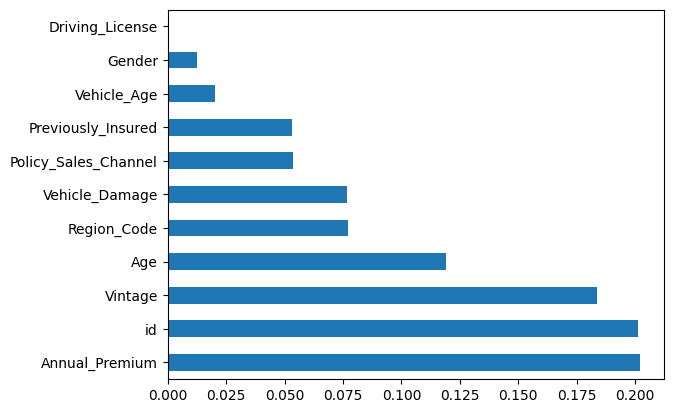

In [ ]:
# Visualize feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False,inplace=True)
importances.plot(kind='barh')
plt.show()

What all feature selection methods have you used and why?

We used implicit feature selection where we use the attribute called ' feature_importances_ which is associated with tree based model.
The tree based model assigns importance score to the features based on how frequently they are used in making a decision for tree.

Which all features you found important and why?

Driving License and Gender are the least important feature as per the result. Theortically also, insurance is applicable only for license holders and also insurance premium doesnot affect with gender. Also ID doesnot play any role other that it being unique id per each customer.Hence we can remove feature 'ID'

### **Data Transformation**

In [ ]:
# Transform Your data  based on feature selection
Insurance_df.drop(['Driving_License','Gender'],axis=1,inplace=True)
Insurance_df.head()

,id,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28,0,2,1,40454.0,26,217,1
1,2,76,3,0,1,0,33536.0,26,183,0
2,3,47,28,0,2,1,38294.0,26,27,1
3,4,21,11,1,0,0,28619.0,152,203,0
4,5,29,41,1,0,0,27496.0,152,39,0


### **Data Scaling**

In [ ]:
# Scaling your data

minmax=MinMaxScaler()

Insurance_df[['Age','Vintage']]=minmax.fit_transform(Insurance_df[['Age','Vintage']])

robust=RobustScaler()

Insurance_df[['Annual_Premium']]=robust.fit_transform(Insurance_df[['Annual_Premium']])

Insurance_df

,id,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.369231,28,0,2,1,0.603521,26,0.716263,1
1,2,0.861538,3,0,1,0,-0.014655,26,0.598616,0
2,3,0.415385,28,0,2,1,0.410508,26,0.058824,1
3,4,0.015385,11,1,0,0,-0.454026,152,0.667820,0
4,5,0.138462,41,1,0,0,-0.554374,152,0.100346,0
...,...,...,...,...,...,...,...,...,...,...
381104,381105,0.830769,26,1,1,0,-0.315432,26,0.269896,0
381105,381106,0.153846,37,1,0,0,0.564382,152,0.418685,0
381106,381107,0.015385,30,1,0,0,0.126709,160,0.522491,0
381107,381108,0.738462,14,0,2,1,0.975516,124,0.221453,0


Which method have you used to scale you data and why?

Features like Previously_Insured , Vehicle_Age , Vehicle_Damage, Response are already classified numerically, hence scaling is not needed.

For feature Annual Premium, we allowed certain outliers as they are valuable.Hence applying Robust Scaling to feature- Annual Premium.

Then applied MinMax Scaling on other useful features - Age, Vintage.

### **Data Splitting**

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = Insurance_df.drop('Response',axis=1)
y = Insurance_df['Response']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(228667, 9)
(57167, 9)


What data splitting ratio have you used and why?

We used 80% - 20% ratio for train and test data.